<a href="https://colab.research.google.com/github/proflynch/Tekbac/blob/master/XOR_Backpropagation_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XOR Backpropagation Program in Python

Final hidden weights: [4.8416625 6.6814058] [4.84684758 6.70210374]
Final hidden bias: [-7.43088009 -3.00582936]
Final output weights: [-11.00572956] [10.31312565]
Final output bias: [-4.80560731]

Output from neural network after 100,000 epochs: [0.01305143] [0.9888541] [0.98883889] [0.01147144]


Text(0, 0.5, 'Outputs')

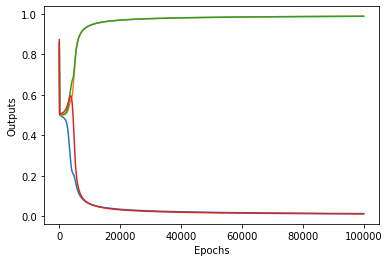

In [1]:
# XOR Backpropagation with plots.

import numpy as np 
import matplotlib.pyplot as plt

O1=[]
O2=[]
O3=[]
O4=[]

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

#Input datasets
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
expected_output = np.array([[0],[1],[1],[0]])

epochs = 100000
lr = 0.1
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

#Random weights and bias initialization
hidden_weights = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
hidden_bias =np.random.uniform(size=(1,hiddenLayerNeurons))
output_weights = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
output_bias = np.random.uniform(size=(1,outputLayerNeurons))

#Training algorithm
for _ in range(epochs):
	#Forward Propagation
	hidden_layer_activation = np.dot(inputs,hidden_weights)
	hidden_layer_activation += hidden_bias
	hidden_layer_output = sigmoid(hidden_layer_activation)

	output_layer_activation = np.dot(hidden_layer_output,output_weights)
	output_layer_activation += output_bias
	predicted_output = sigmoid(output_layer_activation)
	O1.append(predicted_output[0])
	O2.append(predicted_output[1])
	O3.append(predicted_output[2])
	O4.append(predicted_output[3])

	#Backpropagation
	error = expected_output - predicted_output
	d_predicted_output = error * sigmoid_derivative(predicted_output)
	
	error_hidden_layer = d_predicted_output.dot(output_weights.T)
	d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

	#Updating Weights and Biases
	output_weights += hidden_layer_output.T.dot(d_predicted_output) * lr
	output_bias += np.sum(d_predicted_output,axis=0,keepdims=True) * lr
	hidden_weights += inputs.T.dot(d_hidden_layer) * lr
	hidden_bias += np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    
print("Final hidden weights: ",end='')
print(*hidden_weights)
print("Final hidden bias: ",end='')
print(*hidden_bias)
print("Final output weights: ",end='')
print(*output_weights)
print("Final output bias: ",end='')
print(*output_bias)

print("\nOutput from neural network after 100,000 epochs: ",end='')
print(*predicted_output)
plt.plot(O1)
plt.plot(O2)
plt.plot(O3)
plt.plot(O4)
plt.xlabel('Epochs')
plt.ylabel('Outputs')